In [4]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.data_process import *
from data.data_util import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


(1000,)
(500,)


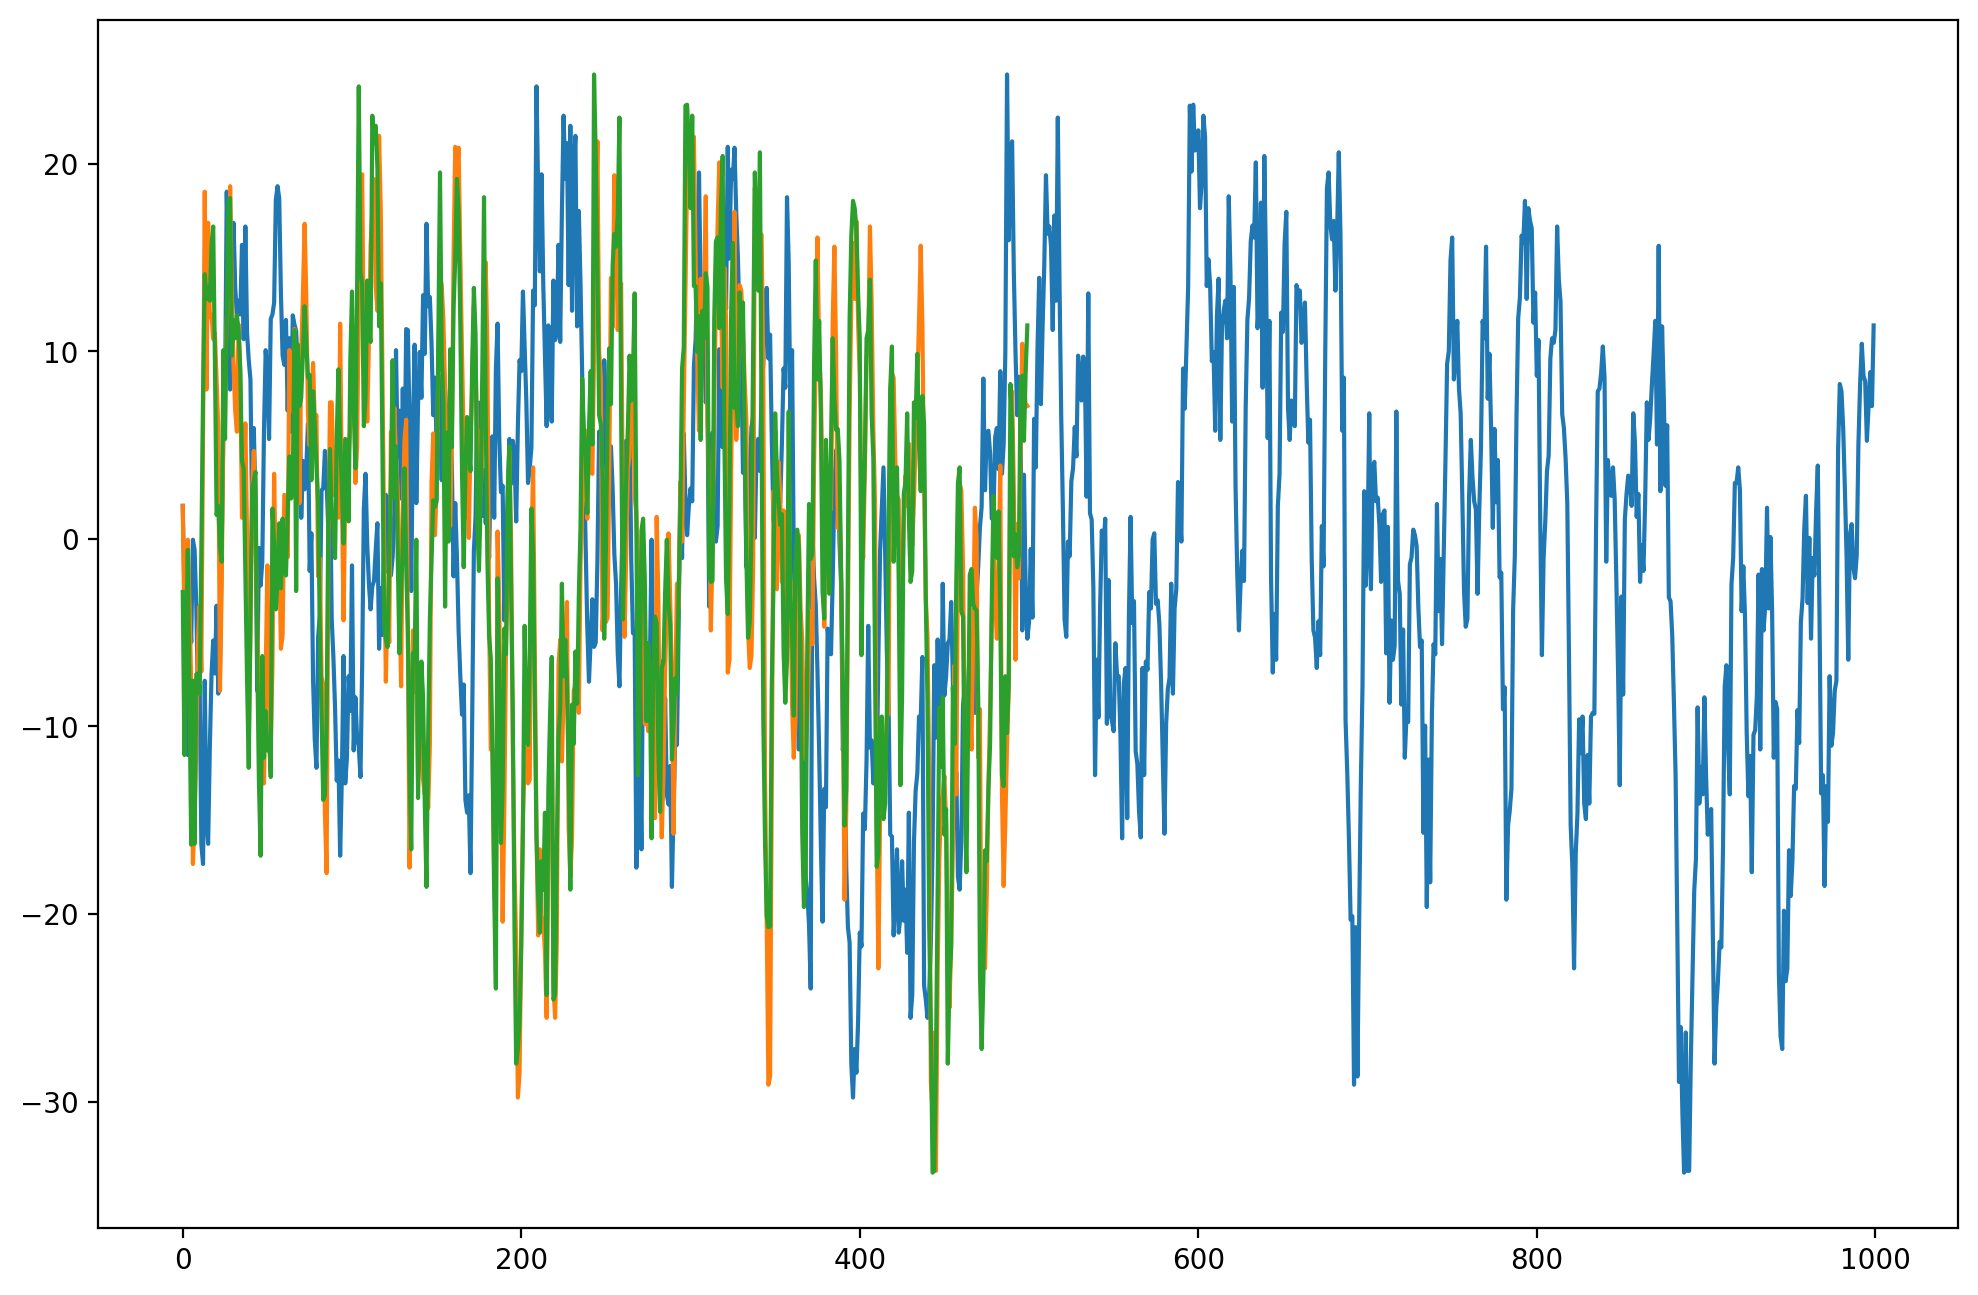

In [4]:
#downsample(X_train_valid)
sig = X_train_valid[75,9]
print(sig.shape)
d1,d2 = split_data(sig)
plt.plot(sig)
plt.plot(d1)
plt.plot(d2)


(1000,)


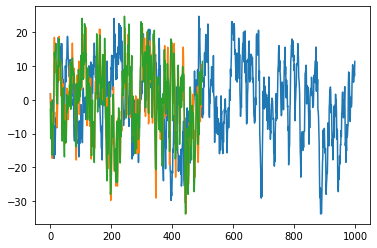

In [2]:
sig = X_train_valid[75,9]
print(sig.shape)
d1,d2 = split_data(sig)
plt.plot(sig)
plt.plot(d1)
plt.plot(d2)


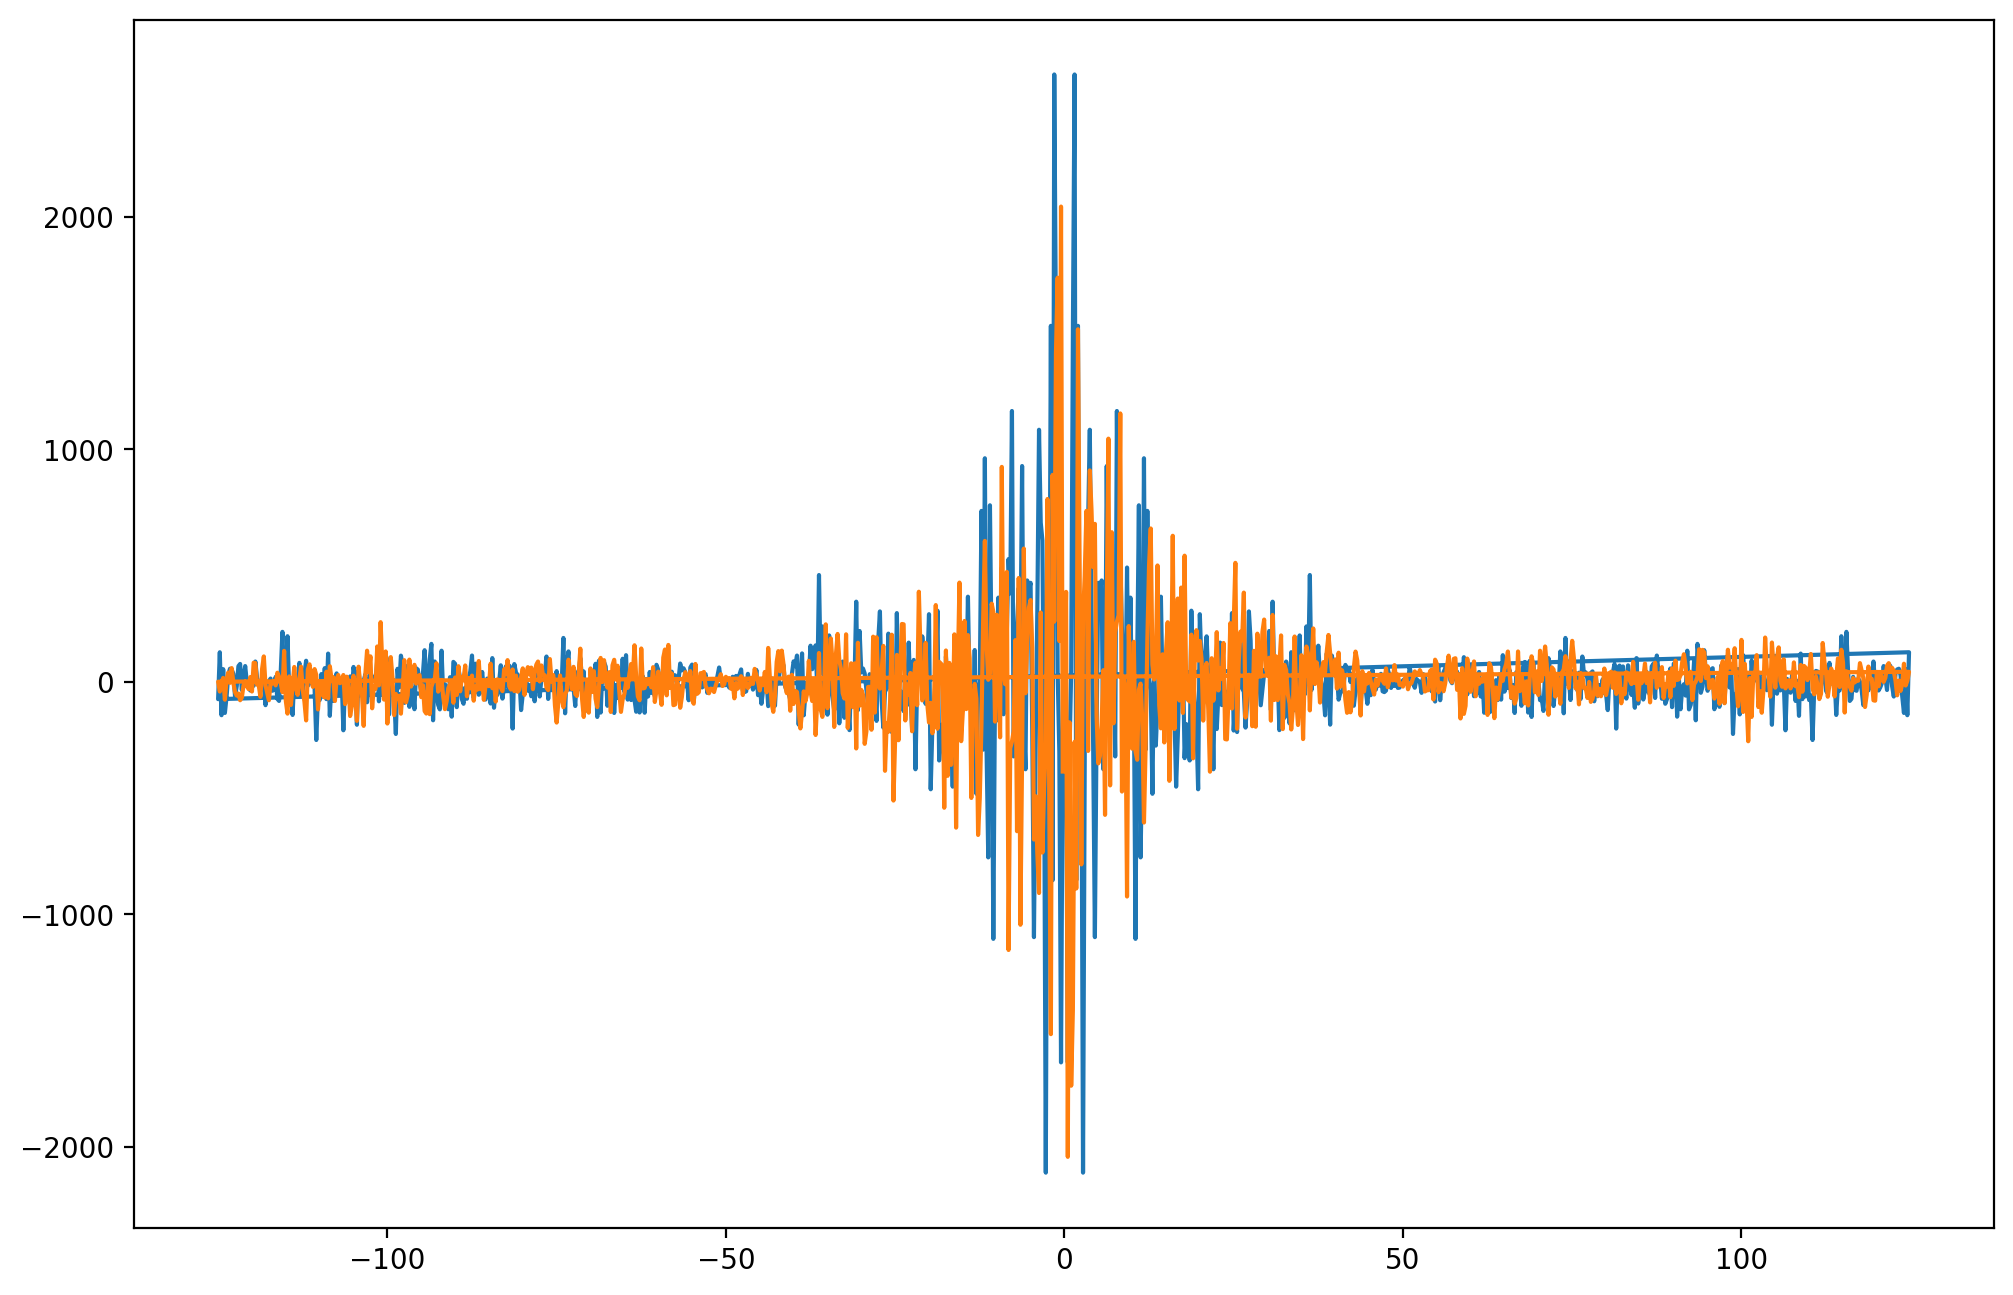

In [55]:

sig = X_train_valid[75,5]
#plot = plt.plot(sig)
sp = np.fft.fft(sig)
freq = np.fft.fftfreq(1000)*250


(1000,)


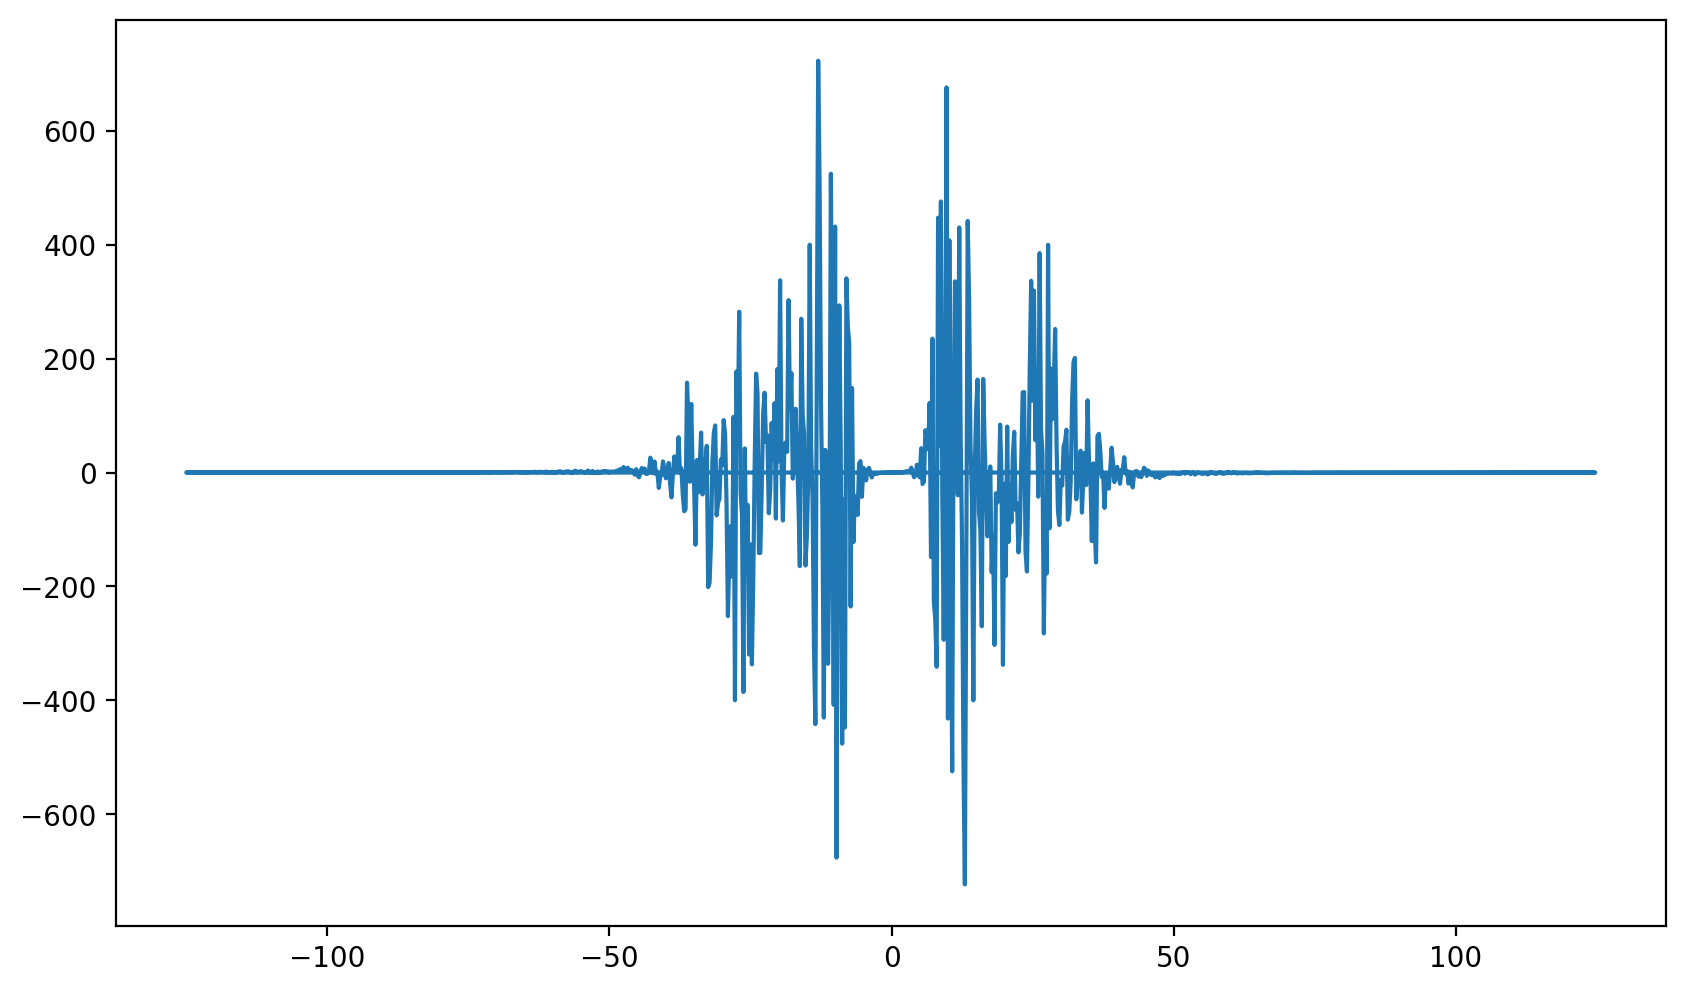

In [27]:
sig = X_train_valid[1,1,:]
def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 250 
lowcut = 8
hightcut = 35 
sig_band = butter_bandpass_filter(sig,lowcut,hightcut,fs)
sp_band = np.fft.fft(sig_band)
freq = np.fft.fftfreq(1000)*250
#plt.plot(freq,sp.real)
#plt.plot(freq,sp.imag)
#a = plt.plot(freq,sp_band.real)
b = plt.plot(freq,sp_band.imag)
print(sp_band.imag.shape)




(1000,)


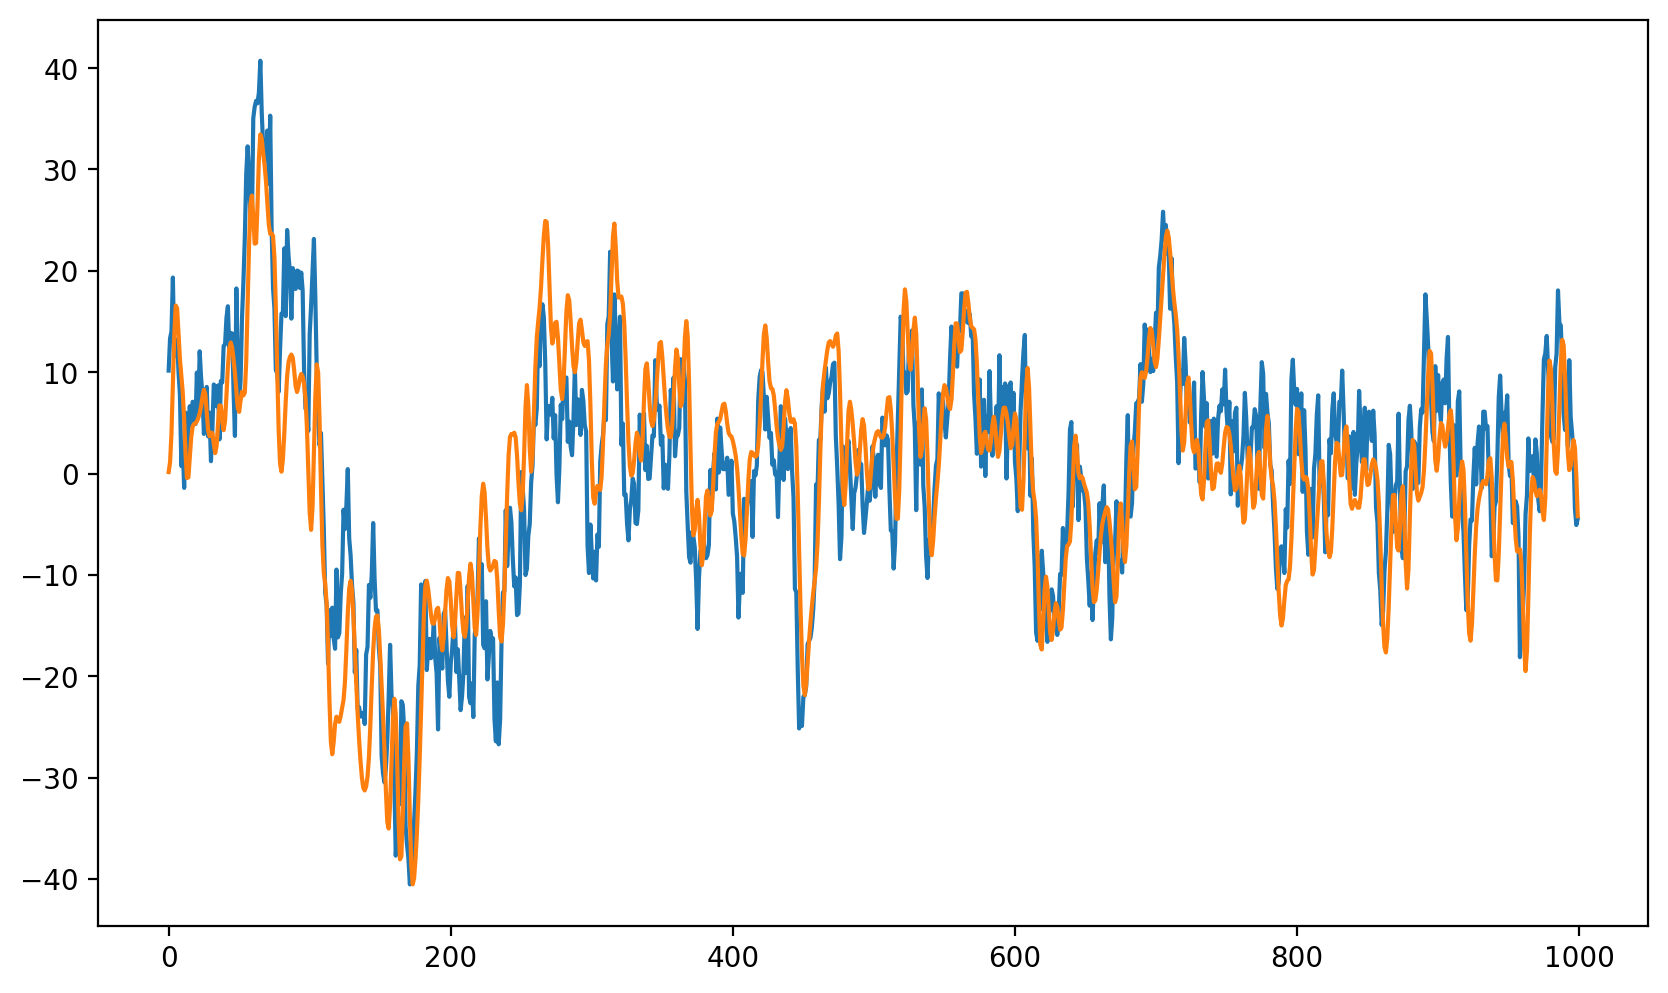

In [4]:
sig = X_train_valid[1,1,:]
plt.plot(sig)
sig_band = butter_bandpass_filter(sig,lowcut=0.1,highcut=45,fs=250)
print(sig_band.shape)
plt.plot(sig_band)

print(X_train_valid.shape)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_0.1_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)



In [ ]:
X_train_val_band = np.load('./data/band_pass_data/X_train_val_0.1_70.npy')
plt.plot(X_train_val_band[1,1,:])

In [10]:
print(X_train_valid_ds.shape)
sig = X_train_valid_ds[2,1,:]
plt.plot(sig)
sig_band = butter_bandpass_filter(sig,lowcut=0.1,highcut=45,fs=250)

plt.plot(sig_band)
plt.plot(sig_band2)


(4230, 22, 500)


NameError: name 'sig_band2' is not defined

## band pass filter 0.5hz to 70 hz 


In [89]:
print(X_train_valid.shape)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid_ds,
    data_filename='./data/band_pass_data/X_train_val_downsample_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid_ds,
    data_filename='./data/band_pass_data/X_train_val_downsample_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)

(2115, 22, 1000)


In [2]:
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)

## Band pass filter 0.1 hz to 70 hz   

In [90]:

band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)


## band pass fitler 0.1 hz to 45 hz 


In [11]:

band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_01_45.npy',
    low_cut=0.1,
    high_cut=45,
    fs=250)
band_pass_data(X_train_valid_ds,
    data_filename='./data/band_pass_data/X_train_val_downsample_01_45.npy',
    low_cut=0.1,
    high_cut=45,
    fs=250)
band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_01_45.npy',
    low_cut=0.1,
    high_cut=45,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_01_45.npy',
    low_cut=0.1,
    high_cut=45,
    fs=250)


## Normalize the data /35 


In [4]:
test_val_dir = './data/band_pass_data/X_test_downsample_norm.npy'
norm_trans = norm_transfer(X_train_valid_ds,test_val_dir)
norm_trans.transfer_and_save()

In [7]:
band_pass_data0145 = './data/band_pass_data/X_train_val_downsample_01_45.npy'
data = np.load(band_pass_data0145)
X_train_valid_ds_01_45_norm_dir= './data/band_pass_data/X_test_val_downsample_01_45_norm.npy'
norm_trans = norm_transfer(data,X_train_valid_ds_01_45_norm_dir)
norm_trans.transfer_and_save()

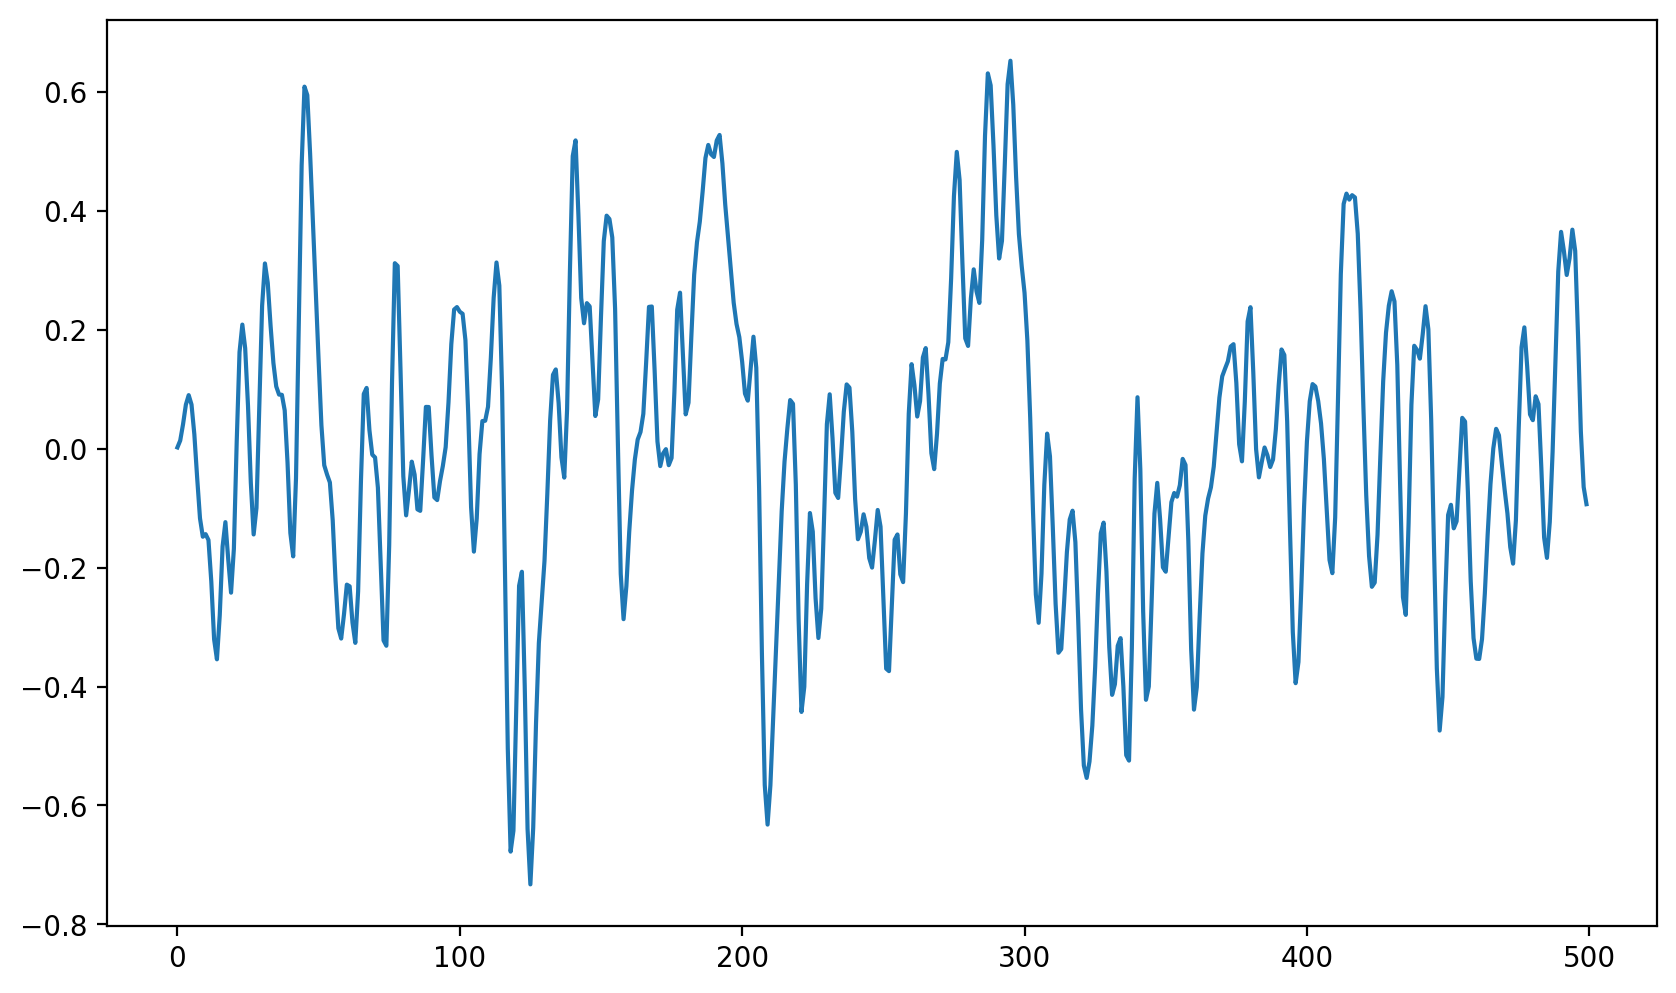

In [10]:
data = np.load('./data/band_pass_data/X_test_val_downsample_01_45_norm.npy')
plt.plot(data[1,1,:])

## fft 



In [5]:
raw_data_dir= './data/band_pass_data/X_train_valid_downsample.npy'
raw_data = np.load(raw_data_dir)
X_train_valid_ds_fft_dir= './data/band_pass_data/X_test_val_downsample_fft.npy'
fft_trans = fft_tansfer(raw_data,X_train_valid_ds_fft_dir)
fft_trans.transfer_and_save()

In [31]:
a = load_data('X_train_valid',data_dir='./data',subject=0,downsampled=True)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 